In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mticker
import time

start = time.time()

df1 = pd.read_csv('day.csv')
df1.head()
df1.tail()
df1.info()
df1.index
df1.columns

print("time1 : ", time.time() - start)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄분류    36 non-null     object
 1   일       36 non-null     int64 
 2   월       36 non-null     int64 
 3   화       36 non-null     int64 
 4   수       36 non-null     int64 
 5   목       36 non-null     int64 
 6   금       36 non-null     int64 
 7   토       36 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.4+ KB
time1 :  0.017951488494873047


In [15]:
second = time.time()

df1['범죄분류'].unique()
df1.groupby(['범죄분류']).count()

print("time2 : ", time.time() - second)

time2 :  0.002989530563354492


In [10]:
third = time.time()

#합계 구하기
df1_group = df1.groupby('범죄분류').sum()
df1_group

print("time3 : ", time.time() - third)

,일,월,화,수,목,금,토
범죄분류,,,,,,,
가정폭력범죄의처벌등에관한특례법,22,23,29,21,34,41,27
강도,153,126,144,144,144,147,132
경범죄처벌법,1005,856,887,934,910,873,1026
공갈,615,765,675,786,780,761,599
과실치사상,407,319,384,353,332,355,433
교통사고처리특례법,20809,27124,26454,27284,27268,29556,27014
도로교통법,2225,2296,2430,2590,2578,2610,2536
도로교통법(무면허운전),6274,6942,6932,6711,6950,6904,6374
도로교통법(사고후미조치),6502,7073,7037,7178,7199,7659,7599


In [11]:
four = time.time()

# 열 합계 계산
df1_group = df1.sum()
df1_group

#df_group의 1행부터 df_new에 저장
#local_count.ipynb -> 기타 부분 값 제거하기 위해서 df_new = df1_group[1:-1] -> -1은 마지막 행
df_new = df1_group[1:]
df_new

print("time4 : ", time.time() - four)

일    149863
월    141340
화    146520
수    148301
목    151136
금    158235
토    165713
dtype: object

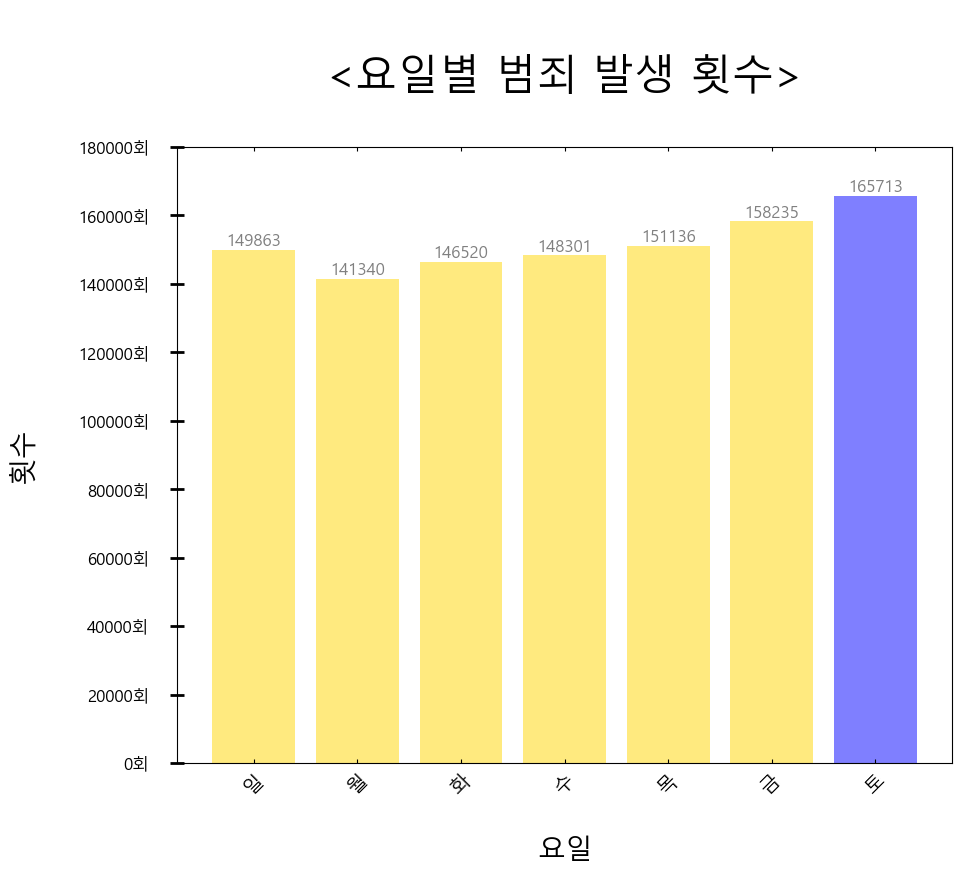

time :  3.5674264430999756


In [12]:
five = time.time()

df_new[6]

x = np.arange(7)

day = df_new.index
count = []

#count배열에 df_new의 값을 넣음
count.append(df_new[0])
count.append(df_new[1])
count.append(df_new[2])
count.append(df_new[3])
count.append(df_new[4])
count.append(df_new[5])
count.append(df_new[6])

# 그래프 폰트 및 사이즈 지정
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10,8))

#x축, y축, 항목별 색, 그래프 너비 지정
bar = plt.bar(day, count, color = ['gold', 'gold', 'gold', 'gold', 'gold', 'gold', 'blue'], alpha = 0.5)

# Y축의 범위: [ymin, ymax]
plt.ylim([0, 180000])     

# 표시 형식
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%d회'))

#요일이 45도 기울어진채로 표시
ax = plt.subplot(1, 1, 1)
for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)
    
# 각 항목의 값이 회색으로 표시
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % height, ha='center', va='bottom', size = 12, color = 'gray')

#눈금 굵기 및 색, 너비 등 지정    
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=14, labelcolor='black', top=True)
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=12, width=2, color='black')
    
#제목, x축 범례, y축 범례 표시
plt.title('\n<요일별 범죄 발생 횟수>\n', fontsize=30)
plt.xlabel('\n요일', fontsize=20)
plt.ylabel('횟수\n', fontsize=20)

#그래프 그리기
plt.show()

print("time5 : ", time.time() - five)